In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tools.eval_measures as em
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt
from datetime import datetime,timedelta
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('oil.csv',parse_dates = ['date'], dayfirst = True)

In [3]:
df.head()

,date,value
0,2010-01-01,8.2
1,2010-02-01,8.4
2,2010-03-01,8.5
3,2010-04-01,8.7
4,2010-05-01,8.7


In [4]:
df.set_index('date',inplace = True)

In [5]:
df.tail()

,value
date,
2017-04-01,9.98
2017-05-01,10.05
2017-06-01,10.06
2017-07-01,10.10
2017-08-01,10.14


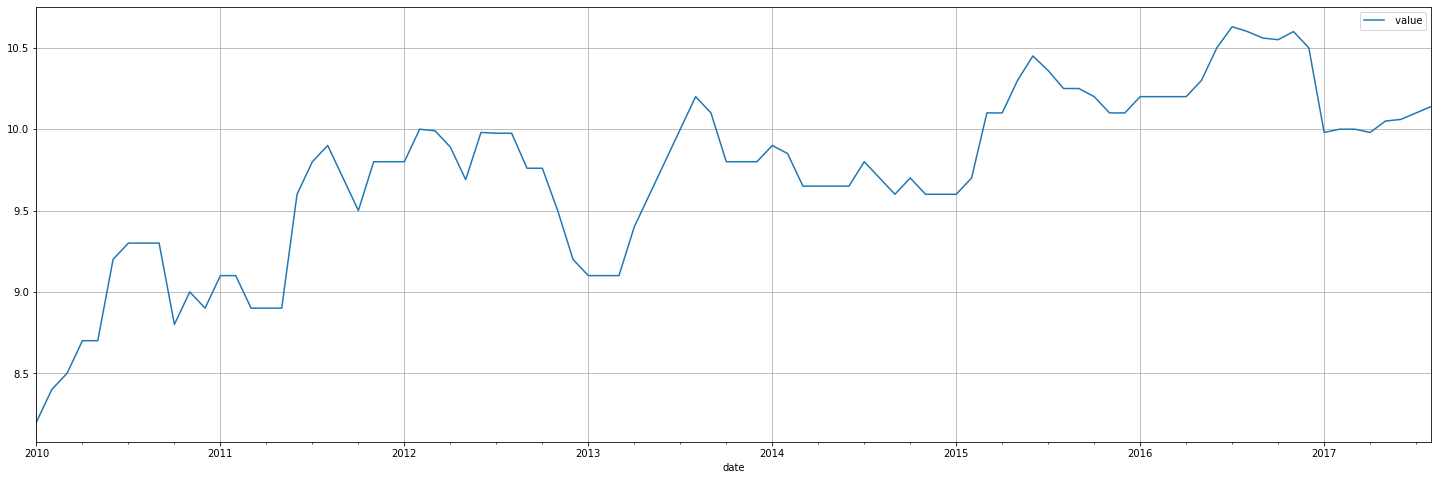

In [6]:
plt.rcParams['figure.figsize'] = 25,8
df.plot(grid = True)

In [7]:
len(df)

92

In [8]:
92*(80/100)

73.60000000000001

In [9]:
train = df.iloc[0:75]

In [10]:
test = df.iloc[75:]

In [11]:
len(train),len(test)

(75, 17)

In [12]:
train

,value
date,
2010-01-01,8.2
2010-02-01,8.4
2010-03-01,8.5
2010-04-01,8.7
2010-05-01,8.7
...,...
2015-11-01,10.1
2015-12-01,10.1
2016-01-01,10.2


In [13]:
test

,value
date,
2016-04-01,10.20
2016-05-01,10.30
2016-06-01,10.50
2016-07-01,10.63
2016-08-01,10.60
2016-09-01,10.56
2016-10-01,10.55
2016-11-01,10.60
2016-12-01,10.50


# <b>Simple Exponential Smoothing</b>

In [15]:
model = SimpleExpSmoothing(train,initialization_method = 'estimated').fit(optimized = True)

In [17]:
pred = model.forecast(steps = len(test))

In [18]:
df

2016-04-01    10.2
2016-05-01    10.2
2016-06-01    10.2
2016-07-01    10.2
2016-08-01    10.2
2016-09-01    10.2
2016-10-01    10.2
2016-11-01    10.2
2016-12-01    10.2
2017-01-01    10.2
2017-02-01    10.2
2017-03-01    10.2
2017-04-01    10.2
2017-05-01    10.2
2017-06-01    10.2
2017-07-01    10.2
2017-08-01    10.2
Freq: MS, dtype: float64

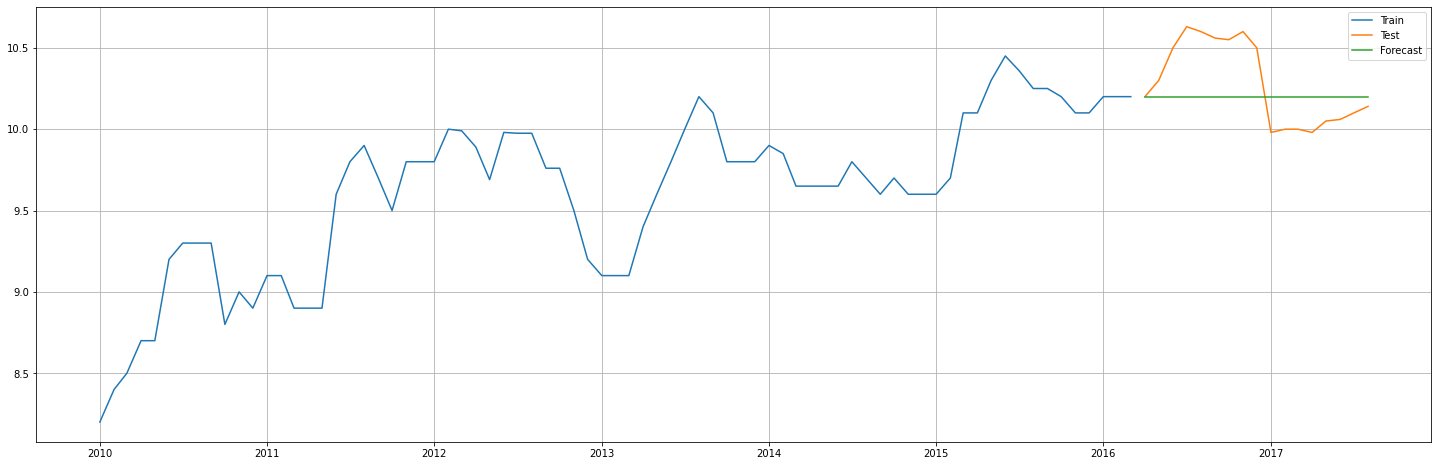

In [20]:
plt.plot(train,label = 'Train')
plt.plot(test,label = 'Test')
plt.plot(pred,label = 'Forecast')
plt.legend(loc = 'best')
plt.grid()

# <b> Root Mean Squared Error </b>

In [21]:
mean_squared_error(test.values,pred.values,squared = False)

0.26340530165730647

# <b>Mean Absolute Percentage Error</b>

In [24]:
def MAPE(y_true, y_pred):
  return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [25]:
MAPE(test.values,pred.values)

2.228172413031799